In [46]:
import numpy as np
from pathlib import Path
from utils.analysis.tools import simDir, periodicity_plot
from matplotlib import pyplot as plt
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d
from utils.plot import _FIGURE_DIR, get_size_inches, _CM

In [47]:
folder = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/05_TimeDelay/20240223_PhaseDiagramHillFaster/M1_1.0_b_-0.25_g_-0.1_c_0.03_k_0.05_kp_0.2_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.1_kt_0.0_rl_0.0_wd_0.0_t_250.0_kd_1.0")
sim = simDir(folder)
sim.run()
sim.condensate()

In [48]:
def periodicity_plot(sim,threshold,leftlim=0,rightlim=20000):
    sim.periodicity(threshold)
    rna = np.ravel(sim.rna_amount)
    com = np.ravel(sim.com[:,0])
    time = np.ravel(sim.time)
    time = time[:len(rna)]
    fig,axes = plt.subplots(4,1,sharex=True)
    fig.set_size_inches(5,3)
    axes[0].plot(time,rna)
    start = np.argmin((time-threshold)**2)
    axes[0].scatter(time[sim.peaks],rna[sim.peaks],alpha=0.3)
    axes[0].scatter(time[sim.troughs],rna[sim.troughs],alpha=0.3)
    diffs = np.diff(time[sim.peaks],axis=0)
    locst = (time[sim.peaks][:-1] + time[sim.peaks][1:])/2
    for i in range(len(diffs)):
        axes[0].annotate(f"{diffs[i].item():.0f}",(locst[i],0),ha='center',rotation=90,
                         va='bottom')
    axes[1].plot(time,com)
    axes[2].plot(time,np.var(sim.radius,axis=1))
    axes[3].plot(time,sim.eccentricity)
    [ax.axvline(i, color='grey', ls='dashed') for i in time[sim.peaks] for ax in axes]
    axes[3].set_xlabel("Time")
    axes[0].set_ylabel("RNA\nAmount")
    axes[1].set_ylabel("Center of\nMass")
    axes[2].set_ylabel("Variance of\nRadius")
    axes[3].set_ylabel("Eccentricity")
    axes[3].set_xlim(left=leftlim,right=rightlim)
    return fig,axes,sim.peaks,sim.troughs

Text(0.5, 0.98, 'Time Delay = 250')

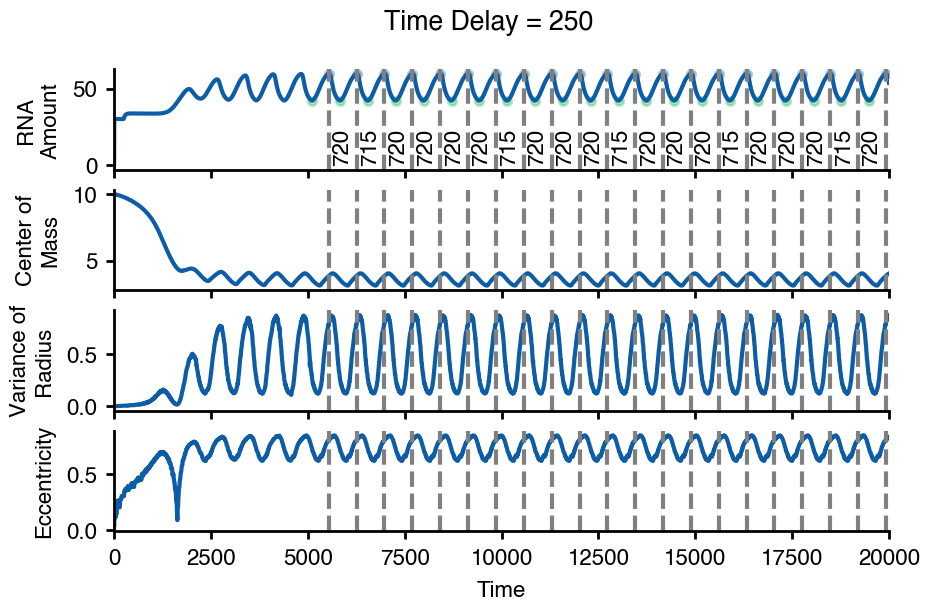

In [49]:
fig, axes, peaks, troughs = periodicity_plot(sim,5000)
fig.suptitle("Time Delay = 250")

In [50]:
def shape(xy,c,ax,cmap="Blues",vmin=None,vmax=None,xlim=None,ylim=None,levels=None):
    x = xy[:,0]
    y = xy[:,1]
    ax.tricontourf(x,y,c,cmap=cmap,
                   vmin=vmin,vmax=vmax,
                   levels=levels)
    ax.set_aspect(1)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        ax.tick_params(
        axis='both',
        which='both',
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

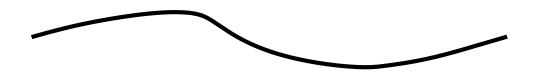

In [51]:
mids = ((peaks+troughs)/2).astype(int)
fig,ax = plt.subplots()
fig.set_size_inches(8.5*_CM,1*_CM)
times = np.linspace(mids[17],mids[18],10).astype(int)
ax.plot(sim.time[times[0]:times[-1]],sim.rna_amount[times[0]:times[-1]],color='Black',linewidth=1.5)
ax.set_ylabel("RNA Amount")
ax.set_xlabel("Time")
ax.set_axis_off()
plt.savefig(_FIGURE_DIR/"Fig3_A_OscillationAsymmetricRNAAmount")

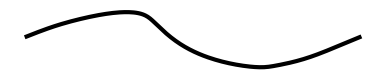

In [52]:
mids = ((peaks+troughs)/2).astype(int)
fig,ax = plt.subplots()
fig.set_size_inches(6*_CM,1*_CM)
times = np.linspace(mids[17],mids[18],10).astype(int)
ax.plot(sim.time[times[0]:times[-1]],sim.rna_amount[times[0]:times[-1]],color='Black',linewidth=1.5)
ax.set_ylabel("RNA Amount")
ax.set_xlabel("Time")
ax.set_axis_off()
plt.savefig(_FIGURE_DIR/"Fig3_A_OscillationAsymmetricRNAAmount_less")

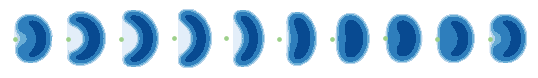

In [53]:
times = np.linspace(mids[17],mids[18],10).astype(int)
fig,axes = plt.subplots(1,len(times))
fig.set_size_inches(8.5*_CM,1*_CM)
for ax, time in zip(np.ravel(axes),times):
    xy = sim.xy[sim.mask[time,:],:]
    conc = sim.concentration_profile[0][time][sim.mask[time,:]]
    shape(xy,conc,ax,xlim=(-1,7),levels=3)
    ax.scatter(x=0, y=0, s=2, color='#9DD08A',marker=".")
# plt.savefig("deform_collapse_protein.png", transparent=True, dpi=300, bbox_inches='tight')
plt.savefig(_FIGURE_DIR/"Fig3_A_OscillationAsymmetric")

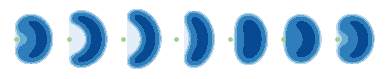

In [54]:
times = np.linspace(mids[17],mids[18],7).astype(int)
fig,axes = plt.subplots(1,len(times))
fig.set_size_inches(6*_CM,1*_CM)
for ax, time in zip(np.ravel(axes),times):
    xy = sim.xy[sim.mask[time,:],:]
    conc = sim.concentration_profile[0][time][sim.mask[time,:]]
    shape(xy,conc,ax,xlim=(-1,7),levels=3)
    ax.scatter(x=0, y=0, s=2, color='#9DD08A',marker=".")
# plt.savefig("deform_collapse_protein.png", transparent=True, dpi=300, bbox_inches='tight')
plt.savefig(_FIGURE_DIR/"Fig3_A_OscillationAsymmetric_less")

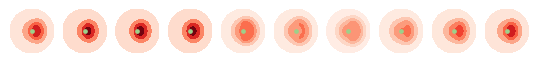

In [55]:
times = np.linspace(mids[17],mids[18],10).astype(int)
fig,axes = plt.subplots(1,len(times))
fig.set_size_inches(8.5*_CM,1*_CM)
radius = 8
mask = np.sum(sim.xy**2,axis=1)<radius**2
for ax, time in zip(np.ravel(axes),times):
    xy = sim.xy[mask,:]
    conc = sim.concentration_profile[1][time][mask]
    shape(xy,conc,ax,cmap="Reds",vmin=sim.plotting_range[1][0],vmax=sim.plotting_range[1][1],levels=3)
    ax.scatter(x=0, y=0, s=2, color='#9DD08A',marker=".")
plt.savefig(_FIGURE_DIR/"Fig3_A_OscillationAsymmetricRNA")

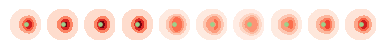

In [56]:
fig,axes = plt.subplots(1,len(times))
fig.set_size_inches(6*_CM,1*_CM)
radius = 8
mask = np.sum(sim.xy**2,axis=1)<radius**2
for ax, time in zip(np.ravel(axes),times):
    xy = sim.xy[mask,:]
    conc = sim.concentration_profile[1][time][mask]
    shape(xy,conc,ax,cmap="Reds",vmin=sim.plotting_range[1][0],vmax=sim.plotting_range[1][1],levels=3)
    ax.scatter(x=0, y=0, s=2, color='#9DD08A',marker=".")
plt.savefig(_FIGURE_DIR/"Fig3_A_OscillationAsymmetricRNA_less")

In [57]:
folder = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/05_TimeDelay/20240223_PhaseDiagramHillFaster/M1_1.0_b_-0.25_g_-0.1_c_0.02_k_0.05_kp_0.2_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.1_kt_0.0_rl_0.0_wd_0.0_t_250.0_kd_1.0")
sim = simDir(folder)

In [58]:
sim.run()
sim.condensate()
sim.rna()

In [59]:
len(sim.time)

5000

Text(0.5, 0.98, 'Time Delay = 250')

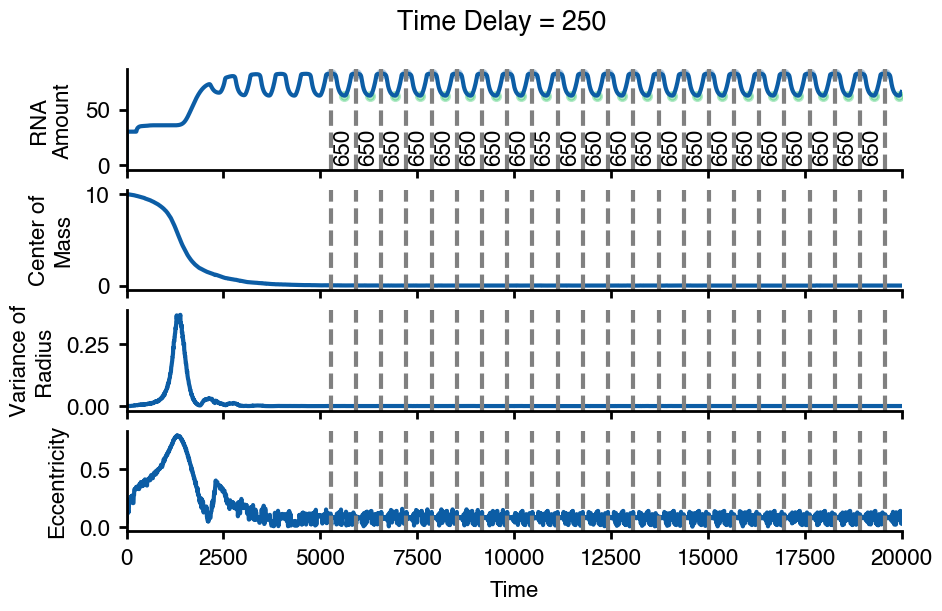

In [60]:
fig, axes, peaks, troughs = periodicity_plot(sim,5000)
fig.suptitle("Time Delay = 250")

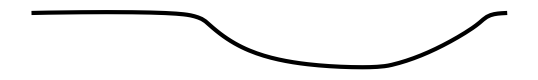

In [80]:
mids = ((peaks+troughs)/2).astype(int)-55
fig,ax = plt.subplots()
fig.set_size_inches(8.5*_CM,1*_CM)
times = np.linspace(mids[18],mids[19],10).astype(int)
ax.plot(sim.time[times[0]:times[-1]],sim.rna_amount[times[0]:times[-1]],color='Black',linewidth=1.5)
ax.set_ylabel("RNA Amount")
ax.set_xlabel("Time")
ax.set_axis_off()
plt.savefig("deform_collapse_rnaamount_circular.png", transparent=True, dpi=300, bbox_inches='tight')
plt.savefig(_FIGURE_DIR/"Fig3_A_OscillationSymmetricRNAAmount")

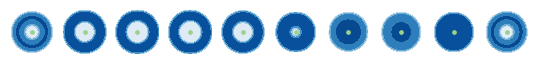

In [81]:
fig,axes = plt.subplots(1,len(times))
fig.set_size_inches(8.5*_CM,1*_CM)
for ax, time in zip(np.ravel(axes),times):
    xy = sim.xy[sim.mask[time,:],:]
    conc = sim.concentration_profile[0][time][sim.mask[time,:]]
    shape(xy,conc,ax,xlim=(-5,5),levels=3)
    ax.scatter(x=0, y=0, s=2, color='#9DD08A',marker=".")
plt.savefig(_FIGURE_DIR/"Fig3_A_OscillationSymmetric")

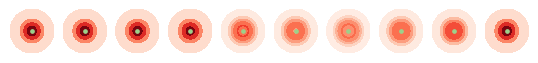

In [82]:
fig,axes = plt.subplots(1,len(times))
fig.set_size_inches(8.5*_CM,1*_CM)
radius = 8
mask = np.sum(sim.xy**2,axis=1)<radius**2
for ax, time in zip(np.ravel(axes),times):
    xy = sim.xy[mask,:]
    conc = sim.concentration_profile[1][time][mask]
    shape(xy,conc,ax,cmap="Reds",vmin=sim.plotting_range[1][0],vmax=sim.plotting_range[1][1],levels=3)
    ax.scatter(x=0, y=0, s=2, color='#9DD08A',marker=".")
plt.savefig(_FIGURE_DIR/"Fig3_A_OscillationSymmetricRNA")

In [80]:
folder = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/05_TimeDelay/20240223_PhaseDiagramHillFaster/M1_1.0_b_-0.25_g_-0.1_c_0.015_k_0.05_kp_0.2_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.1_kt_0.0_rl_0.0_wd_0.0_t_100.0_kd_1.0")
sim = simDir(folder)
sim.run()
sim.condensate()

Text(0.5, 0.98, 'Time Delay = 100')

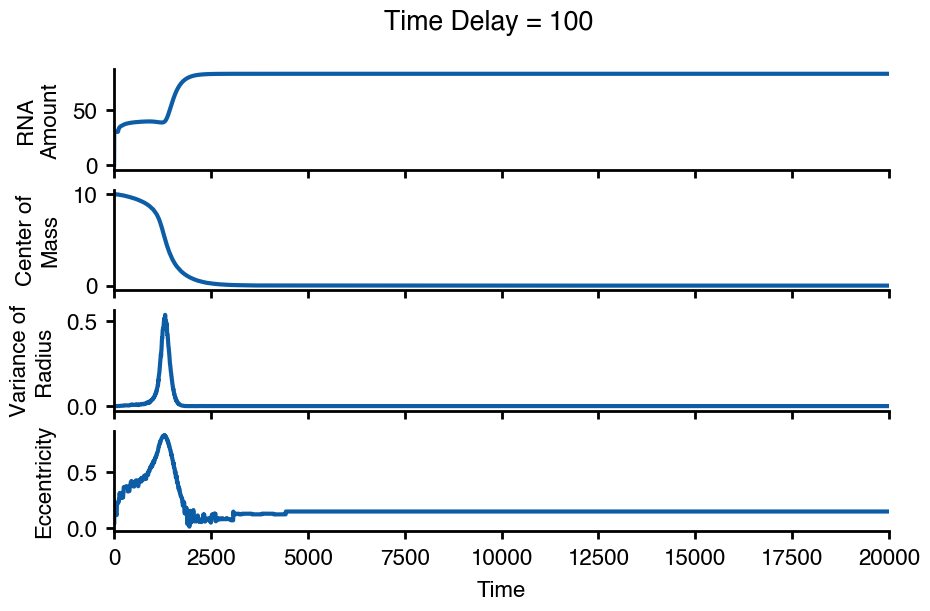

In [81]:
fig, axes, peaks, troughs = periodicity_plot(sim,20000)
fig.suptitle("Time Delay = 100")